<!--BOOK_INFORMATION-->
<img align="left" src="" style="width: 76px; height: 100px; background: white; border: 1px solid black; margin-right:10px;">
*This notebook contains an excerpt from the upcoming book Machine Learning for OpenCV by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [None](04.00-Representing-Data-and-Engineering-Features.ipynb) | [Contents](../README.md) | [Representing Categorical Variables](04.02-Representing-Categorical-Variables.ipynb) >

# Reducing the Dimensionality of the Data

## Implementing Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that is helpful whenever we are dealing with
high-dimensional data. 

What PCA does is rotate all data points until the data lie aligned with the two axes (the two
inset vectors) that explain most of the spread of the data. PCA considers these two axes to
be the most informative, because if you walk along them, you can see most of the data
points separated. In more technical terms, PCA aims to transform the data to a new
coordinate system by means of an orthogonal linear transformation. The new coordinate
system is chosen such that if you project the data onto these new axes, the first coordinate
(called the first principal component) observes the greatest variance.

In [1]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

In [2]:
X = np.vstack((x, y)).T

In [3]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.72409281,  0.68970255],
       [-0.68970255,  0.72409281]])

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

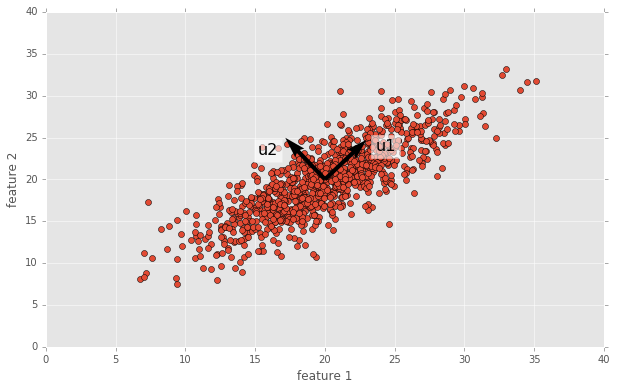

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [6]:
X2 = cv2.PCAProject(X, mu, eig)

[-20, 20, -10, 10]

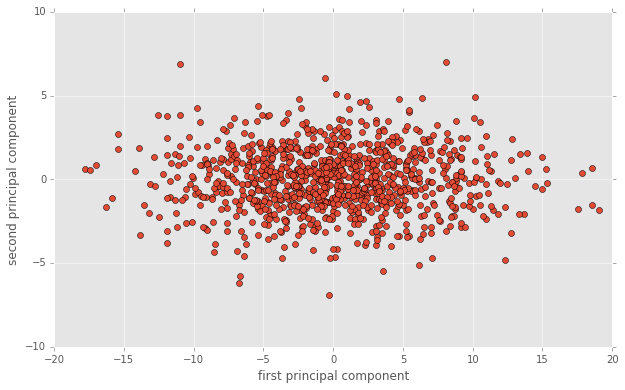

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

## Implementing Independent Component Analysis (ICA)

In [8]:
from sklearn import decomposition

In [9]:
ica = decomposition.FastICA()

In [10]:
X2 = ica.fit_transform(X)

[-0.2, 0.2, -0.2, 0.2]

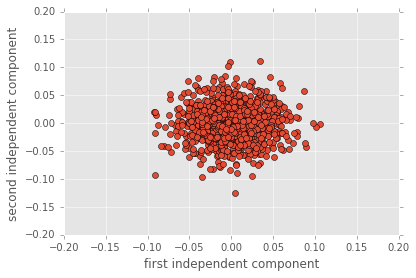

In [11]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

## Implementing Non-Negative Matrix Factorization (NMF)

In [12]:
nmf = decomposition.NMF()

In [13]:
X2 = nmf.fit_transform(X)

[-5, 15, -5, 15]

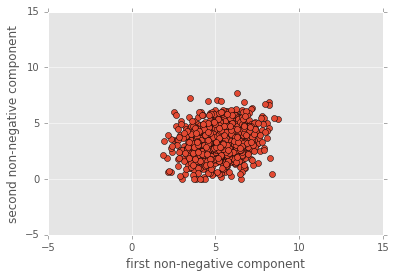

In [14]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([-5, 15, -5, 15])

<!--NAVIGATION-->
< [None](04.00-Representing-Data-and-Engineering-Features.ipynb) | [Contents](../README.md) | [Representing Categorical Variables](04.02-Representing-Categorical-Variables.ipynb) >